In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
response_by_shopping_history = pd.read_csv("../response_by_shopping_history_test")

In [ ]:
# Visualize response by relevant_category_volume to see outliers before visualizing correlation.

data = response_by_shopping_history[["response", "relevant_category_volume"]]

x = data.relevant_category_volume.to_numpy()
y = data.response.to_numpy()

sns.regplot(data=data, x="relevant_category_volume", y="response")
plt.title("Response - Relevant Category Volume")
plt.show()

upper_limit = data["relevant_category_volume"].quantile(0.999)
upper_limit

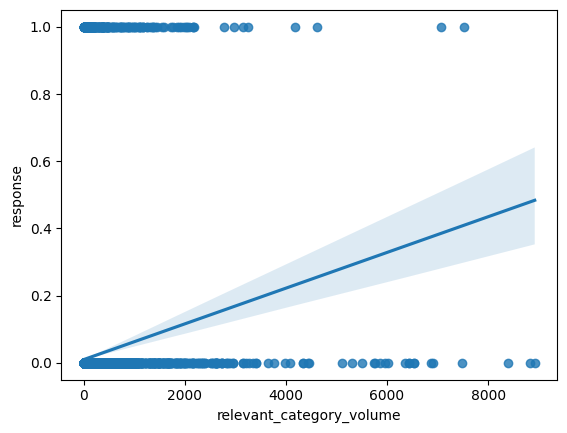

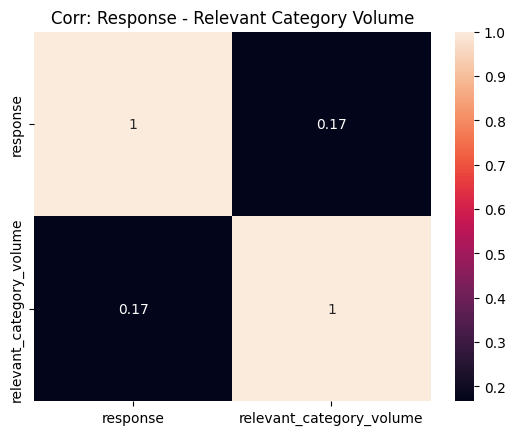

In [ ]:
# Visualize correlation heat map for response and relevant_category_volume

mark_1 = (data["relevant_category_volume"] <= upper_limit)
data_marked = data[mark_1]

correlation = data_marked.corr()

# sns.boxplot(data=data, y="relevant_category_volume", x="response")
sns.regplot(data=data_marked, x="relevant_category_volume", y="response")
plt.show()

sns.heatmap(correlation, annot=True)
plt.title("Corr: Response - Relevant Category Volume")
plt.show()

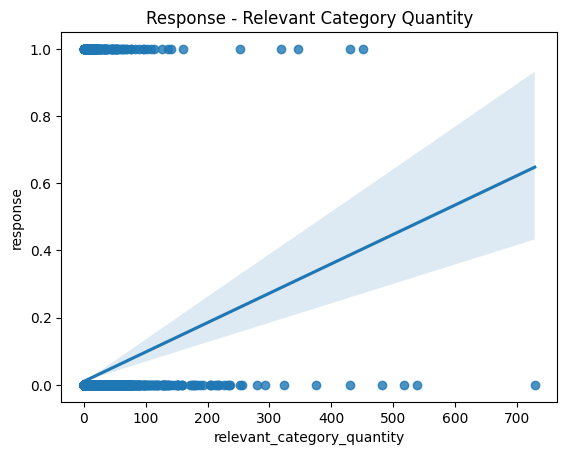

532.072824999969

In [ ]:
# Visualize response by relevant_category_quantity to see outliers before visualizing correlation.

data = response_by_shopping_history[["response", "relevant_category_quantity"]]

x = data.relevant_category_quantity.to_numpy()
y = data.response.to_numpy()

sns.regplot(data=data, x="relevant_category_quantity", y="response")
plt.title("Response - Relevant Category Quantity")
plt.show()

upper_limit = data["relevant_category_quantity"].quantile(0.9999)
upper_limit

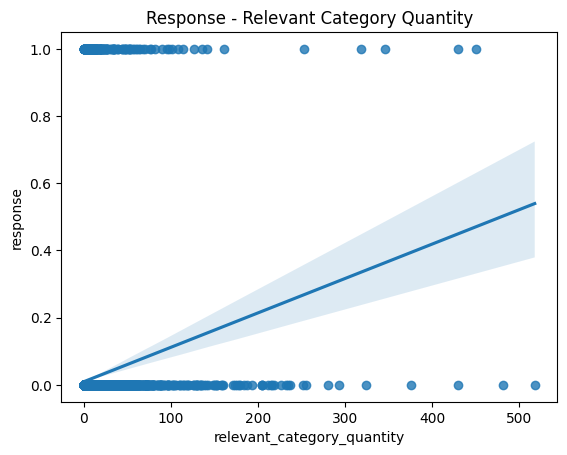

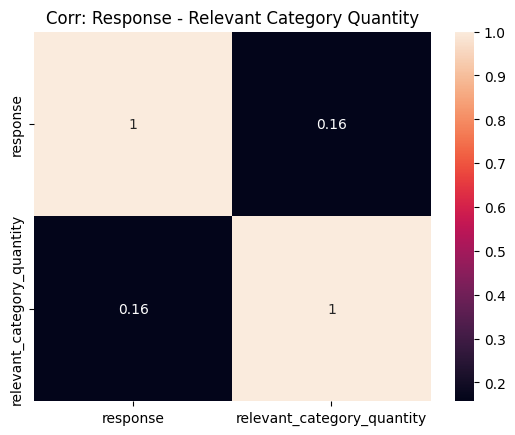

In [ ]:
# Visualize correlation heat map for response and relevant_category_quantity

mark_2 = data["relevant_category_quantity"] <= upper_limit
data_marked = data[mark_2]

sns.regplot(data=data_marked, x="relevant_category_quantity", y="response")
plt.title("Response - Relevant Category Quantity")
plt.show()

correlation = data_marked.corr()
sns.heatmap(correlation, annot=True)
# sns.boxplot(data=data_marked, y="relevant_category_quantity", x = "response")
plt.title("Corr: Response - Relevant Category Quantity")
plt.show()

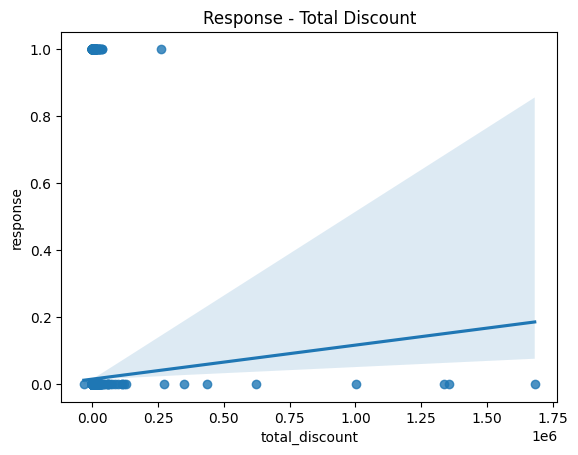

96467.75422058853

In [ ]:
# Visualize response by total_discount to see outliers before visualizing correlation.
data = response_by_shopping_history[["response", "total_discount"]]

x = data.total_discount.to_numpy()
y = data.response.to_numpy()

sns.regplot(data=data, x="total_discount", y="response")
plt.title("Response - Total Discount")
plt.show()

upper_limit = data["total_discount"].quantile(0.999)
upper_limit

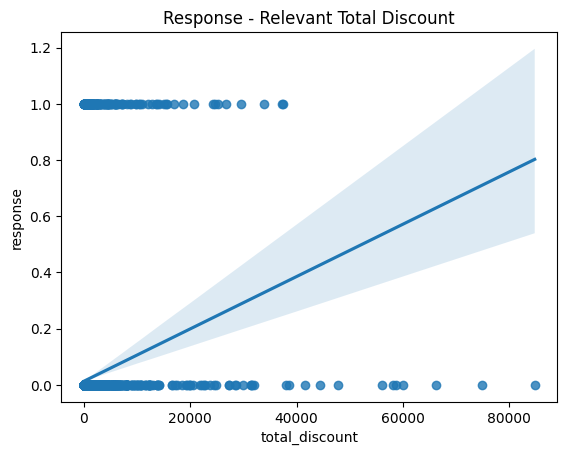

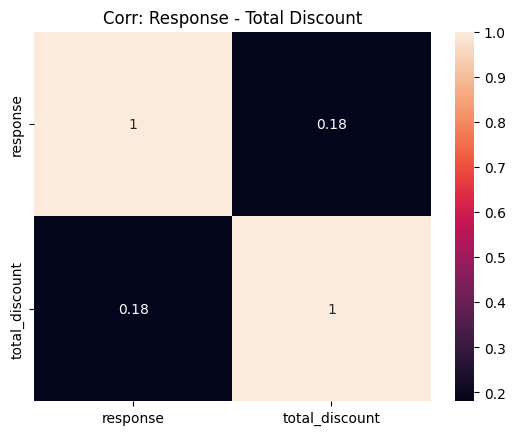

In [ ]:
# Visualize correlation heat map for response and total_discount

mark_3 = (data["total_discount"] <= upper_limit) & (data["total_discount"] > 0)
data_marked = data[mark_3]

sns.regplot(data=data_marked, x="total_discount", y="response")
plt.title("Response - Relevant Total Discount")
plt.show()

correlation = data_marked.corr()
sns.heatmap(correlation, annot=True)
# sns.boxplot(data=data_marked, y="total_discount", x = "response")
plt.title("Corr: Response - Total Discount")
plt.show()

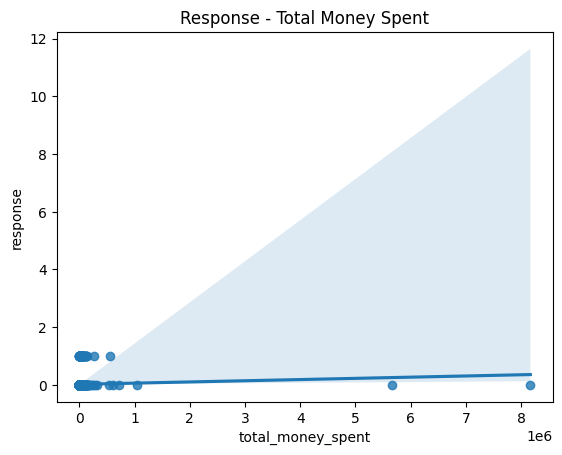

4223674.215903368

In [ ]:
# Visualize response by total_money_spent to see outliers before visualizing correlation.
data = response_by_shopping_history[["response", "total_money_spent"]]

x = data.total_money_spent.to_numpy()
y = data.response.to_numpy()

sns.regplot(data=data, x="total_money_spent", y="response")
plt.title("Response - Total Money Spent")
plt.show()

upper_limit = data["total_money_spent"].quantile(0.9999)
upper_limit

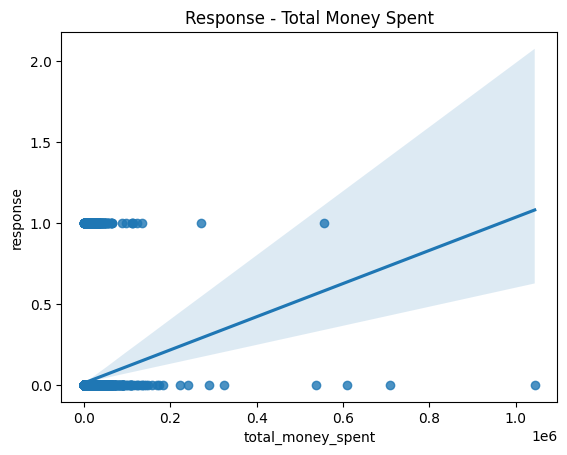

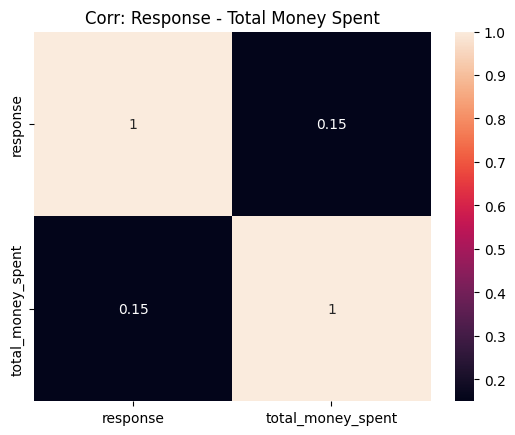

In [ ]:
# Visualize correlation heat map for response and total_money_spent

mark_4 = data["total_money_spent"] <= upper_limit
data_marked = data[mark_4]

sns.regplot(data=data_marked, x="total_money_spent", y="response")
plt.title("Response - Total Money Spent")
plt.show()

correlation = data_marked.corr()
sns.heatmap(correlation, annot=True)
# sns.boxplot(data=data_marked, y="total_money_spent", x = "response")
plt.title("Corr: Response - Total Money Spent")
plt.show()

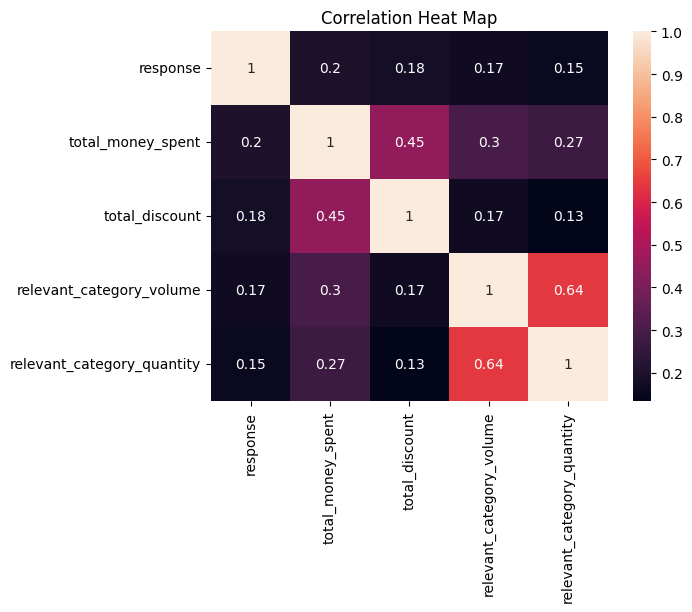

In [ ]:
# Visualize correlation between all shopping related features:
data = response_by_shopping_history[["response", "total_money_spent", "total_discount", "relevant_category_volume", "relevant_category_quantity"]]
mark = mark_1 & mark_2 & mark_3 & mark_4
correlation = data[mark].corr()

sns.heatmap(correlation, annot=True)
plt.title("Correlation Heat Map")
plt.show()
